In [1]:
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching SeuratObject



In [2]:
library(ggplot2)
library(cowplot)


Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots




In [3]:

## remove the x-axis text and tick
## plot.margin to adjust the white space between each plot.
## ... pass any arguments to VlnPlot in Seurat
modify_vlnplot<- function(obj, 
                          feature, 
                          pt.size = 0, 
                          plot.margin = unit(c(-0.75, 0, -0.75, 0), "cm"),
                          ...) {
  p<- VlnPlot(obj, features = feature, pt.size = pt.size, ... )  + 
    xlab("") + ylab(feature) + ggtitle("") + 
    theme(legend.position = "none", 
          axis.text.x = element_blank(), 
          axis.ticks.x = element_blank(), 
          axis.title.y = element_text(size = rel(1), angle = 0), 
          axis.text.y = element_text(size = rel(1)), 
          plot.margin = plot.margin ) 
  return(p)
}

## extract the max value of the y axis
extract_max<- function(p){
  ymax<- max(ggplot_build(p)$layout$panel_scales_y[[1]]$range$range)
  return(ceiling(ymax))
}


## main function
StackedVlnPlot<- function(obj, features,
                          pt.size = 0, 
                          plot.margin = unit(c(-0.75, 0, -0.75, 0), "cm"),
                          ...) {
  
  plot_list<- purrr::map(features, function(x) modify_vlnplot(obj = obj,feature = x, ...))
  
  # Add back x-axis title to bottom plot. patchwork is going to support this?
  plot_list[[length(plot_list)]]<- plot_list[[length(plot_list)]] +
    theme(axis.text.x=element_text(), axis.ticks.x = element_line())
  
  # change the y-axis tick to only max value 
  ymaxs<- purrr::map_dbl(plot_list, extract_max)
  plot_list<- purrr::map2(plot_list, ymaxs, function(x,y) x + 
                            scale_y_continuous(breaks = c(y)) + 
                            expand_limits(y = y))

  p<- patchwork::wrap_plots(plotlist = plot_list, ncol = 1)
  return(p)
}

In [4]:
samples<-read.csv(file='samplelist2.csv')

In [5]:
filenames4<-samples$X

In [6]:
filenames4<-gsub('X','',filenames4)

In [7]:
filenames4

[1] "1Ca.csv"             "1N.csv"              "2534465Ca.csv"      
 [4] "2534465N.csv"        "2537821Ca.csv"       "2537821N.csv"       
 [7] "3Ca.csv"             "3N.csv"              "clean2393116Ca.csv" 
[10] "clean2393116N.csv"   "clean2518780Ca.csv"  "clean2518780N.csv"  
[13] "clean2520263Ca.csv"  "clean2520263N.csv"   "clean2523247Ca.csv" 
[16] "clean2523247N.csv"   "clean43540519Ca.csv" "clean43540519N.csv" 
[19] "N6.csv"              "N7.csv"              "P4.csv"             
[22] "P5.csv"              "T4.csv"              "T5.csv"             
[25] "T6.csv"              "T7.csv"              "2Ca.csv"            
[28] "2N.csv"

In [8]:
temp<-read.csv(filenames4[1],header=T)
temp
temp2<-temp[,c(1,8)]

X,circfind,CIRI,findcirc,circexp,sum,count,result
<chr>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>
chr1_100011364_100017815_+,0,2,1,0,2,3,1.50
chr1_100049908_100061949_+,1,0,0,1,2,2,1.00
chr1_100049908_100069685_+,3,0,3,3,3,9,3.00
chr1_100059877_100068586_+,1,0,1,1,3,3,1.00
chr1_100136881_100140514_+,2,0,0,2,2,4,2.00
chr1_100436132_100462881_+,1,0,1,0,2,2,1.00
chr1_100494817_100499262_+,1,0,1,1,3,3,1.00
chr1_100906851_100921841_+,3,5,2,3,4,13,3.25
chr1_100906851_100965918_+,1,0,1,0,2,2,1.00


In [9]:
#count of single circRNA max: 1000

In [10]:
temp2$result<-round(temp2$result)
temp2<-temp2[which(temp2$result<1000),]
colnames(temp2)<-c("circRNA",filenames4[1])
data4 <- temp2

In [11]:
for (i in 2:28){
  temp<-read.csv(filenames4[i],header=T)
  temp
  temp2<-temp[,c(1,8)]
  temp2$result<-round(temp2$result)
  temp2<-temp2[which(temp2$result<1000),]
  colnames(temp2)<-c("circRNA",filenames4[i])
  data4 <- merge(data4,temp2,all=T)
}

In [12]:
data4[is.na(data4)]<-0
data4
write.csv(data4,file="0707_allmeancirc.csv")

circRNA,1Ca.csv,1N.csv,2534465Ca.csv,2534465N.csv,2537821Ca.csv,2537821N.csv,3Ca.csv,3N.csv,clean2393116Ca.csv,⋯,N6.csv,N7.csv,P4.csv,P5.csv,T4.csv,T5.csv,T6.csv,T7.csv,2Ca.csv,2N.csv
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1_100007033_100017815_+,0,0,0,0,0,0,0,2,0,⋯,0,1,0,0,0,0,0,0,2,0
chr1_100007033_100043229_+,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
chr1_100007033_100050004_+,0,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1_100011364_100017815_+,2,0,0,0,0,0,0,0,2,⋯,0,0,0,0,0,0,1,0,2,0
chr1_100015301_100017815_+,0,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
chr1_100024108_100024325_+,0,0,0,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1_100043072_100061949_+,0,0,0,0,0,0,0,0,0,⋯,3,0,0,0,0,0,0,1,0,0
chr1_100043072_100068586_+,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,1,0,0,0
chr1_100043072_100078548_+,0,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0


In [13]:
rownames(data4)<-data4$circRNA
data4$circRNA<-NULL

In [14]:
data4['chrX_140783174_140784659_+',]

,1Ca.csv,1N.csv,2534465Ca.csv,2534465N.csv,2537821Ca.csv,2537821N.csv,3Ca.csv,3N.csv,clean2393116Ca.csv,clean2393116N.csv,⋯,N6.csv,N7.csv,P4.csv,P5.csv,T4.csv,T5.csv,T6.csv,T7.csv,2Ca.csv,2N.csv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX_140783174_140784659_+,642,13,432,4,301,62,183,24,308,30,⋯,177,30,112,224,38,318,90,176,352,68


In [15]:
normal <- CreateSeuratObject(counts = data4, project = "normal",min.cells = 2)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [16]:
normal@meta.data$label<-c(rep(c("cancer",'normal'),times=9),rep('normal',times=4),rep('cancer',times=4),'cancer','normal')

In [17]:
normal@meta.data$center<-c(rep('south',times=2),rep('north',times=4),rep('south',times=2),rep('north',times=10),rep('south',times=10))

In [18]:
normal@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,label,center
,<fct>,<dbl>,<int>,<chr>,<chr>
1Ca.csv,normal,30922,7444,cancer,south
1N.csv,normal,21161,5631,normal,south
2534465Ca.csv,normal,4032,1521,cancer,north
2534465N.csv,normal,4255,1440,normal,north
2537821Ca.csv,normal,12758,4396,cancer,north
2537821N.csv,normal,19409,5855,normal,north
3Ca.csv,normal,19357,5208,cancer,south
3N.csv,normal,23939,5994,normal,south
clean2393116Ca.csv,normal,12193,3610,cancer,north


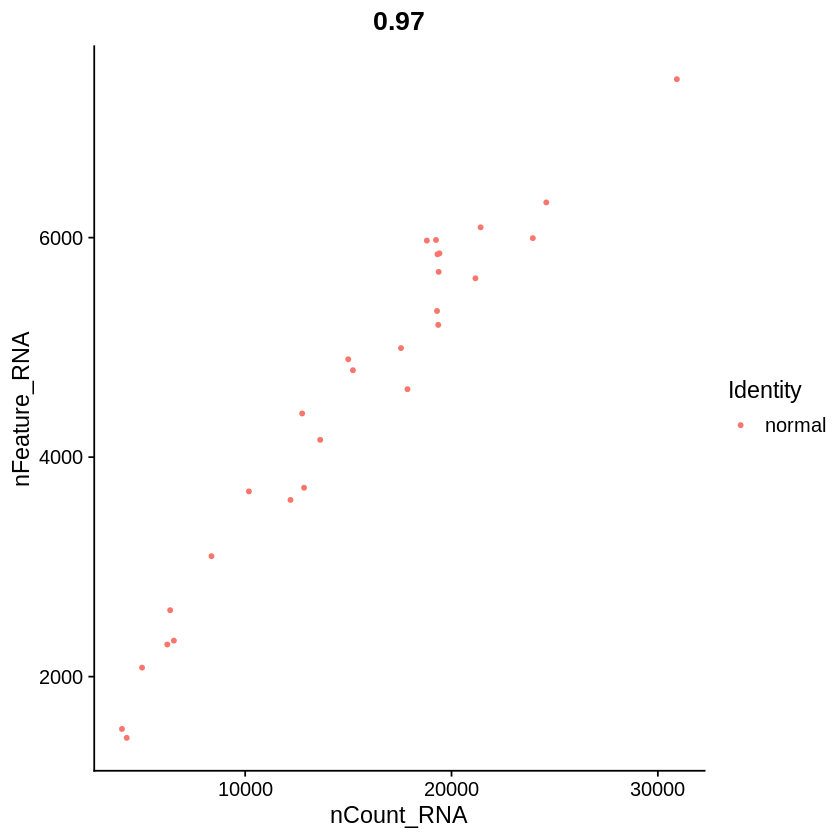

In [19]:
FeatureScatter(normal, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")

In [20]:
normal

An object of class Seurat 
23600 features across 28 samples within 1 assay 
Active assay: RNA (23600 features, 0 variable features)

In [21]:
normal <- NormalizeData(normal, normalization.method = "LogNormalize")

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -1.1629”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.19285”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  8.0137e-31”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.031008”
When using repel, set xnudge and ynudge to 0 for optimal results



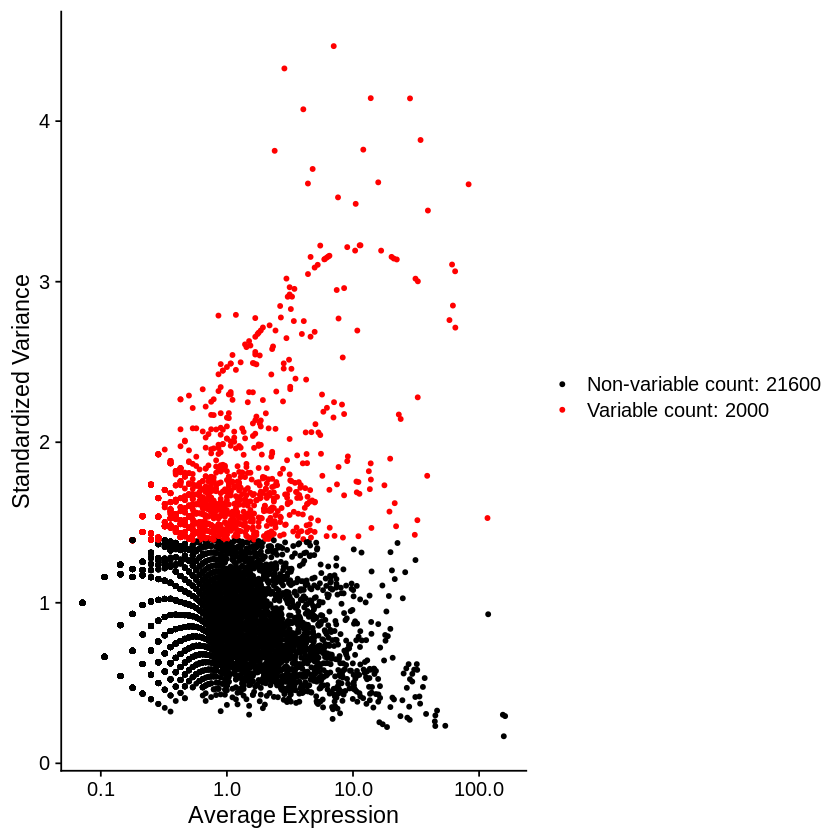

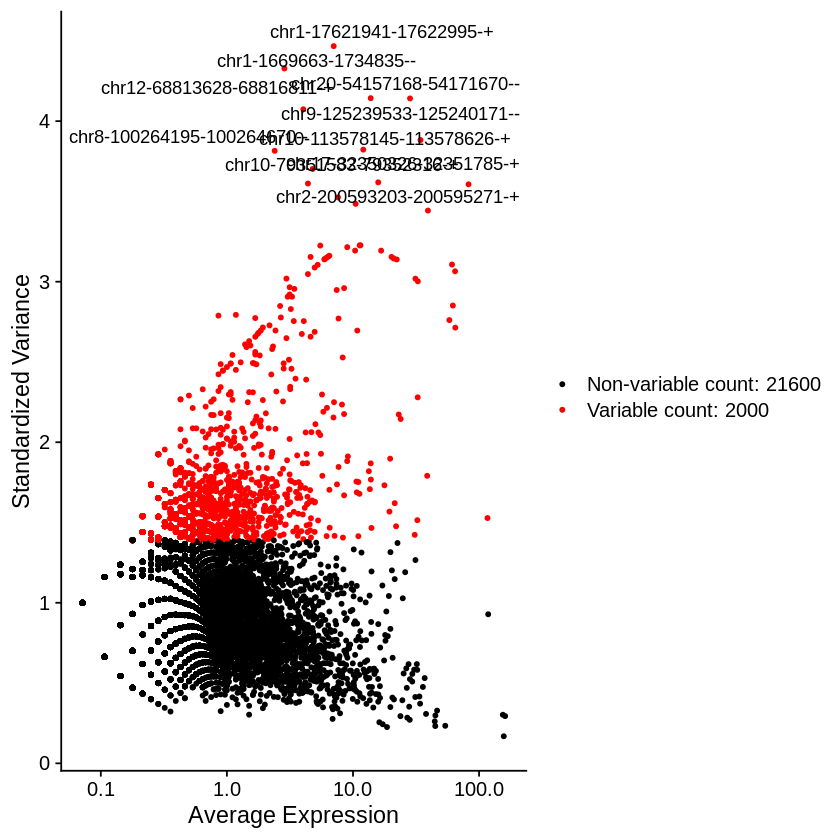

In [22]:
normal <- FindVariableFeatures(normal, selection.method = "vst", nfeatures = 2000)

# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(normal), 10)

# plot variable features with and without labels
plot1 <- VariableFeaturePlot(normal)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
plot1
plot2

In [23]:
pdf("0707-scatter.pdf",width=7,height=6)
plot2
dev.off()

png 
  2

In [24]:
all.genes <- rownames(normal)
normal <- ScaleData(normal, features = all.genes)

Centering and scaling data matrix



In [25]:
normal <- RunPCA(normal, features = VariableFeatures(object = normal),npcs = 27)

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
PC_ 1 
Positive:  chr17-20204332-20205912-+, chr8-141253988-141254629--, chrX-85303405-85308216--, chr4-55403235-55417985-+, chr6-47283937-47286595--, chr5-171183194-171205612-+, chr3-142736378-142748460-+, chr6-70475409-70502791-+, chr1-159918762-159920537--, chr12-95208842-95211267-- 
	   chr14-33925617-33931215--, chr11-6932093-6955782-+, chr5-145796441-145826200--, chr10-93381218-93389154--, chr15-98707561-98708107-+, chr3-185533570-185535132--, chr5-128131066-128141981-+, chr2-8908620-8958642--, chr7-80789305-80805758--, chr18-2890560-2892486-+ 
	   chr1-86715723-86735179-+, chr5-65451474-65473952--, chrX-148651998-148662768-+, chr2-69348170-69363670--, chr11-89421901-89451895--, chr6-17661652-17675770--, chr2-215373321-215391814--, chr10-125743057-125753845-+, chr12-27368261-27390239-+, chr15-90448572-90456315-+ 
Negative:  c

In [26]:
options(repr.plot.height=6,repr.plot.width=7)

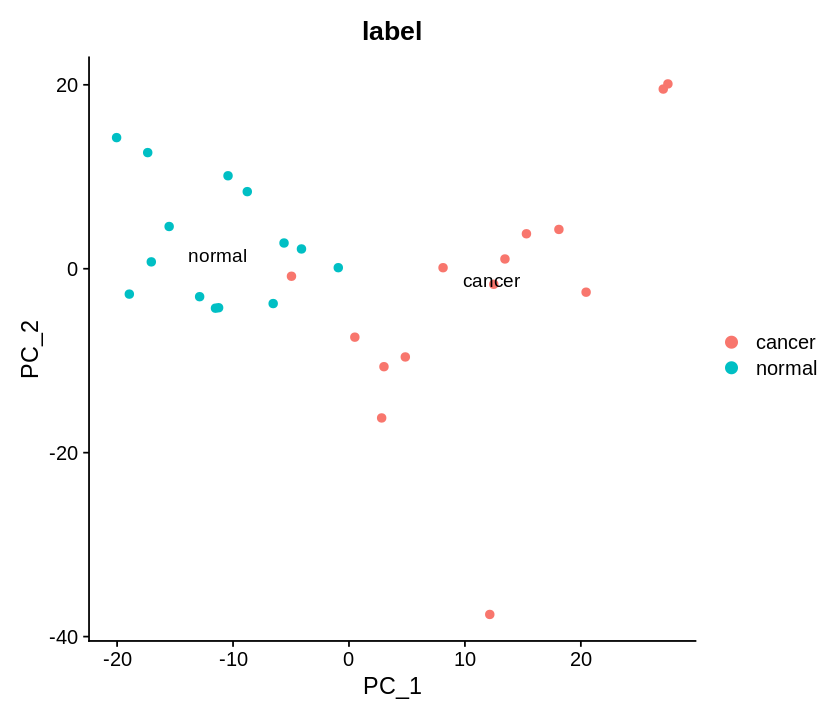

In [27]:
DimPlot(normal, reduction = "pca",group.by='label',label=T,pt.size=2)

In [28]:
pdf("0707-pca.pdf",width=7,height=6)
DimPlot(normal, reduction = "pca",group.by='label',label=T,pt.size=2)
dev.off()

png 
  2

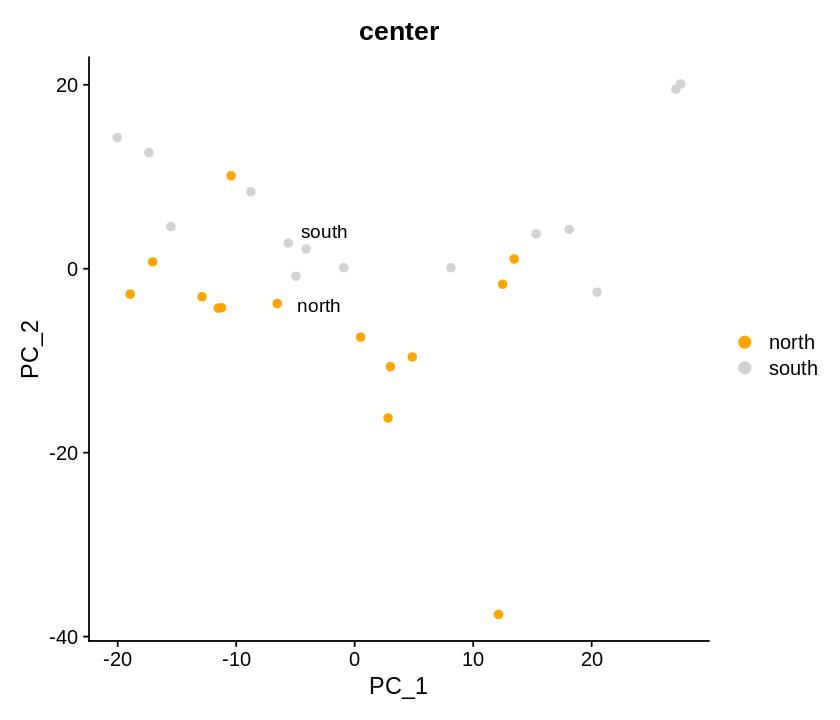

In [29]:
DimPlot(normal, reduction = "pca",group.by='center',label=T,pt.size=2,cols=c('orange','lightgrey'))

In [30]:
pdf("0707-pca-center.pdf",width=7,height=6)
DimPlot(normal, reduction = "pca",group.by='center',label=T,pt.size=2,cols=c('orange','lightgrey'))
dev.off()

png 
  2

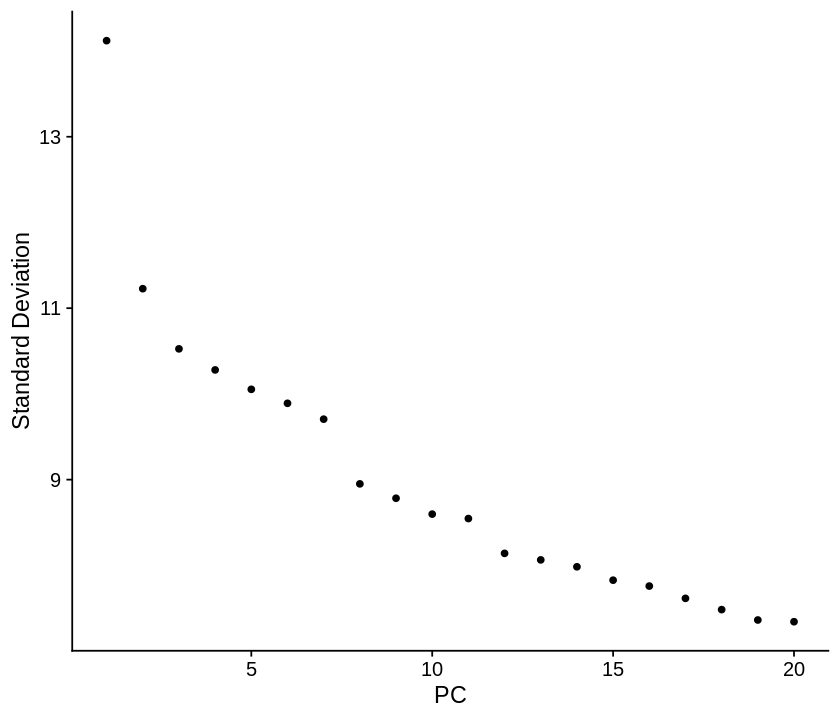

In [31]:
ElbowPlot(normal)

In [32]:
Idents(object = normal) <- "label"

In [33]:
normal3.markers <- FindAllMarkers(normal, only.pos = TRUE, test.use='DESeq2')
top100<-normal3.markers %>% group_by(cluster) %>% top_n(n = 100, wt = avg_log2FC)

Calculating cluster cancer

Warning message:
“multiple methods tables found for ‘which’”
Warning message:
“multiple methods tables found for ‘which’”
converting counts to integer mode

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

Calculating cluster normal

converting counts to integer mode

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates



In [34]:
top100<-as.data.frame(top100)
write.csv(top100,file="0707-top100diffcirc.csv")

In [35]:
marker2<-normal3.markers %>% group_by(cluster) %>% top_n(n = 9, wt = avg_log2FC)

In [36]:
options(repr.plot.height=8,repr.plot.width=8)

In [37]:
genedraw<-c(marker2$gene,'chr1-113834909-113855049--','chr5-65451474-65473952--',"chrX-148651998-148662768-+")

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



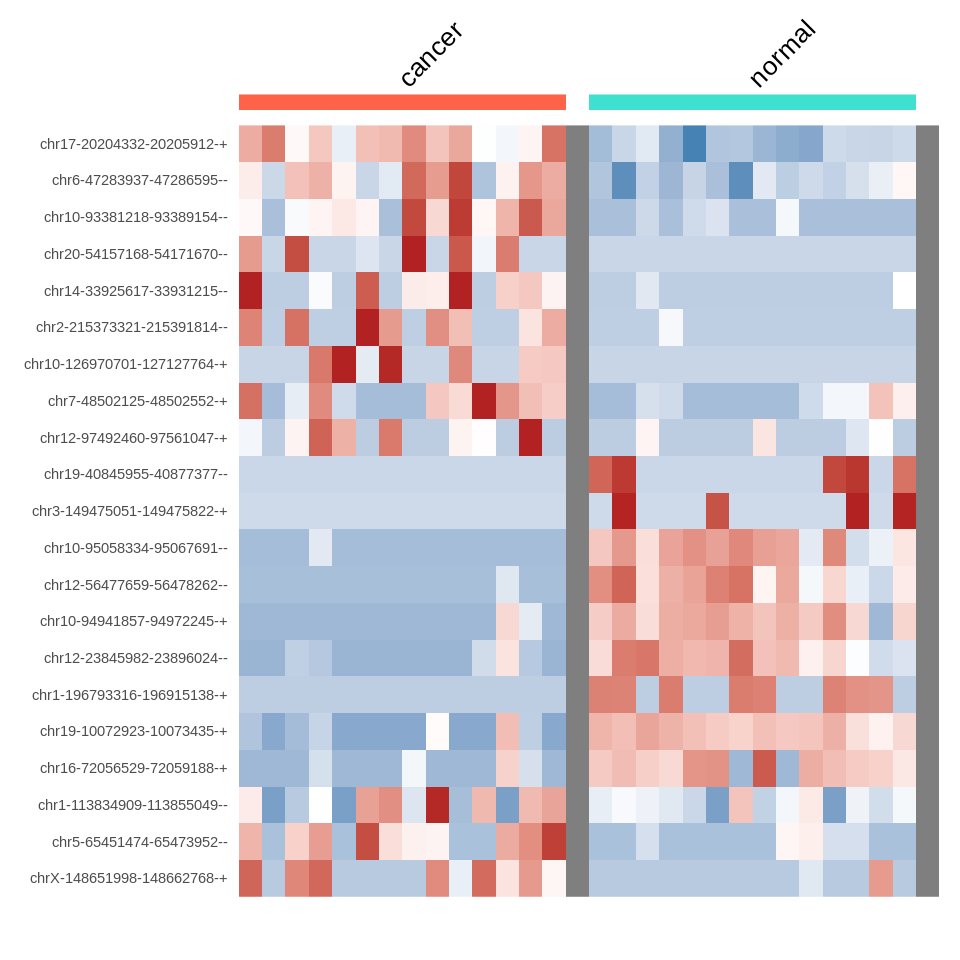

In [38]:
DoHeatmap(normal, features =genedraw,group.colors=c('tomato','turquoise')) + NoLegend() + scale_fill_gradientn(colors = c("steelblue", "white", "firebrick"))

In [39]:
pdf('0805-heatmap2.pdf',width=7,height=6)
DoHeatmap(normal, features =genedraw,group.colors=c('tomato','turquoise')) + NoLegend() + scale_fill_gradientn(colors = c("steelblue", "white", "firebrick"))
dev.off()

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



png 
  2

In [40]:
save(normal,file="0707-seurat-30samples.Rda")

In [41]:
expr_df<-read.csv(file='circRNAannotation.csv')

In [42]:
expr_df

X,gene_name,circRNA,strand
<int>,<chr>,<chr>,<chr>
1,SAMD11,chr1_935771_939412_+,+_+
2,NOC2L,chr1_955922_957273_-,-_-
3,AGRN,chr1_1035276_1041702_+,+_+
4,AGRN,chr1_1043238_1051815_+,+_+
5,AGRN,chr1_1047326_1050837_+,+_+
6,SDF4,chr1_1217376_1217686_-,-_-
7,SDF4,chr1_1218793_1223331_-,-_-
8,SDF4,chr1_1223243_1223968_-,-_-
9,B3GALT6,chr1_1233247_1233878_+,+_+


In [43]:
expr_df$X<-NULL

In [44]:
normal3.markers <- FindAllMarkers(normal, only.pos = TRUE, test.use='DESeq2')
top100<-normal3.markers %>% group_by(cluster) %>% top_n(n = 100, wt = avg_log2FC)

Calculating cluster cancer

converting counts to integer mode

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

Calculating cluster normal

converting counts to integer mode

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates



In [45]:
markers<-as.data.frame(top100)

In [46]:
markers$circRNA<-gsub('-','_',markers$gene)

In [47]:
markers$circRNA<-gsub('__','_-',markers$circRNA)

In [48]:
try<-merge(markers,expr_df,all=F)

In [49]:
write.csv(try,file='0717.diffcircgene.csv',row.names=F)

In [50]:
exprMat<-GetAssayData(normal,slot="data")

In [51]:
exprMat<-as.data.frame(exprMat)

In [52]:
markers2<-markers[which(markers$cluster=="cancer"),]

In [53]:
exprMatdiff<-exprMat[markers2$gene,]

In [54]:
rownames(exprMatdiff)<-gsub('-','_',rownames(exprMatdiff))

In [55]:
rownames(exprMatdiff)<-gsub('__','_-',rownames(exprMatdiff))

In [56]:
write.csv(exprMatdiff,file='0717.cancer.top100diff.csv')

In [57]:
markers2<-markers[which(markers$cluster=="normal"),]

In [58]:
exprMatdiff<-exprMat[markers2$gene,]

In [59]:
rownames(exprMatdiff)<-gsub('-','_',rownames(exprMatdiff))

In [60]:
rownames(exprMatdiff)<-gsub('__','_-',rownames(exprMatdiff))

In [61]:
write.csv(exprMatdiff,file='0717.normal.top100diff.csv')

In [62]:
markers <- normal3.markers %>% group_by(cluster) %>% top_n(n = 30, wt = avg_log2FC)

In [63]:
markerscancer<-markers[which(markers$cluster=="cancer"),]

In [64]:
exprMatdiff<-exprMat[markerscancer$gene,]

In [65]:
rownames(exprMatdiff)<-gsub('-','_',rownames(exprMatdiff))

In [66]:
rownames(exprMatdiff)<-gsub('__','_-',rownames(exprMatdiff))

In [67]:
write.csv(exprMatdiff,file='0717.top30cancerdiff.csv')

In [68]:
markersnor<-markers[which(markers$cluster=="normal"),]

In [69]:
exprMatdiff<-exprMat[markersnor$gene,]

In [70]:
rownames(exprMatdiff)<-gsub('-','_',rownames(exprMatdiff))

In [71]:
rownames(exprMatdiff)<-gsub('__','_-',rownames(exprMatdiff))

In [72]:
write.csv(exprMatdiff,file='0717.top30normaldiff.csv')

In [73]:
expmat4<-as.data.frame(t(exprMat))

In [74]:
expmat4$sample<-rownames(expmat4)

In [75]:
expmat4$sample

[1] "1Ca.csv"             "1N.csv"              "2534465Ca.csv"      
 [4] "2534465N.csv"        "2537821Ca.csv"       "2537821N.csv"       
 [7] "3Ca.csv"             "3N.csv"              "clean2393116Ca.csv" 
[10] "clean2393116N.csv"   "clean2518780Ca.csv"  "clean2518780N.csv"  
[13] "clean2520263Ca.csv"  "clean2520263N.csv"   "clean2523247Ca.csv" 
[16] "clean2523247N.csv"   "clean43540519Ca.csv" "clean43540519N.csv" 
[19] "N6.csv"              "N7.csv"              "P4.csv"             
[22] "P5.csv"              "T4.csv"              "T5.csv"             
[25] "T6.csv"              "T7.csv"              "2Ca.csv"            
[28] "2N.csv"

In [76]:
expmat4$group<-normal@meta.data$label

In [77]:
options(repr.plot.height=5,repr.plot.width=3)

In [78]:
rownames(expmat4)

[1] "1Ca.csv"             "1N.csv"              "2534465Ca.csv"      
 [4] "2534465N.csv"        "2537821Ca.csv"       "2537821N.csv"       
 [7] "3Ca.csv"             "3N.csv"              "clean2393116Ca.csv" 
[10] "clean2393116N.csv"   "clean2518780Ca.csv"  "clean2518780N.csv"  
[13] "clean2520263Ca.csv"  "clean2520263N.csv"   "clean2523247Ca.csv" 
[16] "clean2523247N.csv"   "clean43540519Ca.csv" "clean43540519N.csv" 
[19] "N6.csv"              "N7.csv"              "P4.csv"             
[22] "P5.csv"              "T4.csv"              "T5.csv"             
[25] "T6.csv"              "T7.csv"              "2Ca.csv"            
[28] "2N.csv"

In [79]:
expmat4<-expmat4[c(2,1,3:28),]


Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend




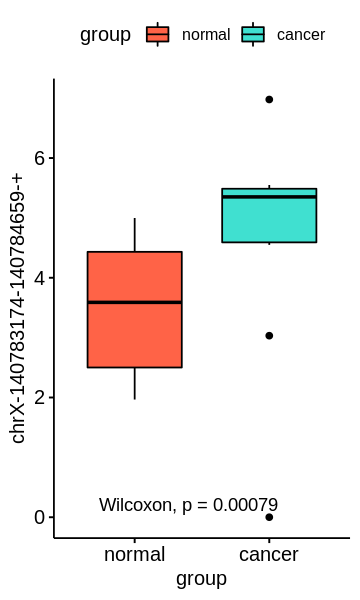

In [80]:
library(ggpubr)
p<-ggboxplot(expmat4, x="group", y="chrX-140783174-140784659-+", fill = "group",palette =c('tomato','turquoise'))+
    stat_compare_means(label.y = 0.1)
p
ggsave('0717-chrX−140783174−140784659−+-2.pdf',height=5,width=3)

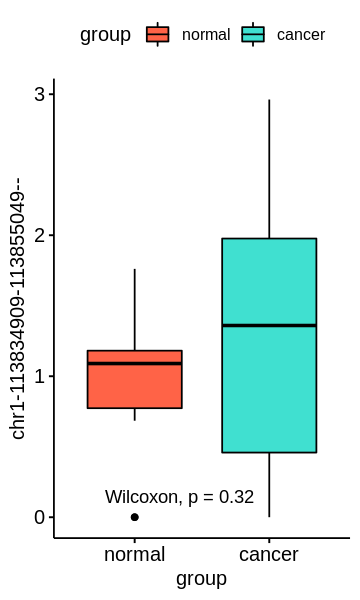

In [81]:
library(ggpubr)
p<-ggboxplot(expmat4, x="group", y="chr1-113834909-113855049--", fill = "group",palette =c('tomato','turquoise'))+
    stat_compare_means(label.y = 0.1)
p
ggsave('0717-chr1-113834909-113855049---2.pdf',height=5,width=3)

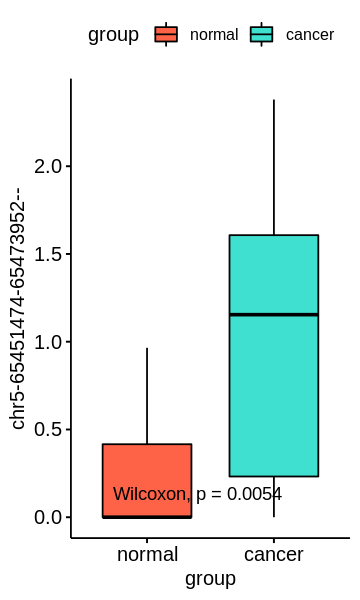

In [82]:
library(ggpubr)
p<-ggboxplot(expmat4, x="group", y="chr5-65451474-65473952--", fill = "group",palette =c('tomato','turquoise'))+
    stat_compare_means(label.y = 0.1)
p
ggsave('0717-chr5-65451474-65473952---2.pdf',height=5,width=3)

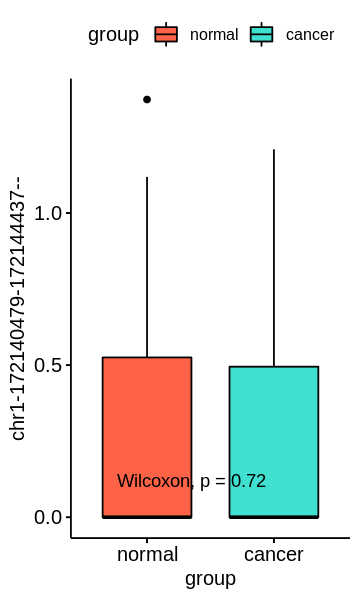

In [83]:
library(ggpubr)
p<-ggboxplot(expmat4, x="group", y="chr1-172140479-172144437--", fill = "group",palette =c('tomato','turquoise'))+
    stat_compare_means(label.y = 0.1)
p
ggsave('0717-chr1-172140479-172144437--.pdf',height=5,width=3)

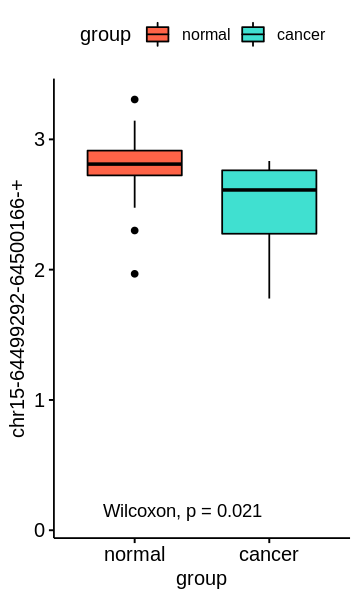

In [84]:
library(ggpubr)
p<-ggboxplot(expmat4, x="group", y="chr15-64499292-64500166-+", fill = "group",palette =c('tomato','turquoise'))+
    stat_compare_means(label.y = 0.1)
p
ggsave('0717-chr15-64499292-64500166-+.pdf',height=5,width=3)

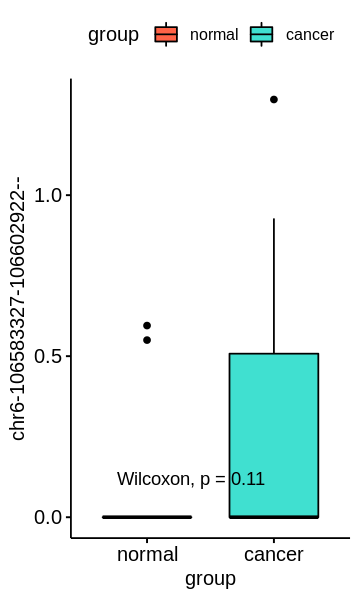

In [85]:
library(ggpubr)
p<-ggboxplot(expmat4, x="group", y="chr6-106583327-106602922--", fill = "group",palette =c('tomato','turquoise'))+
    stat_compare_means(label.y = 0.1)
p
ggsave('0717-chr6-106583327-106602922--.pdf',height=5,width=3)

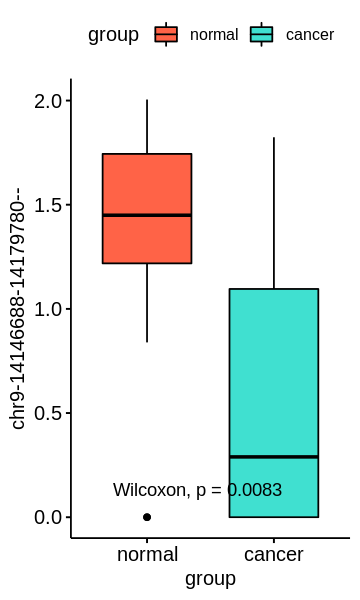

In [86]:
library(ggpubr)
p<-ggboxplot(expmat4, x="group", y="chr9-14146688-14179780--", fill = "group",palette =c('tomato','turquoise'))+
    stat_compare_means(label.y = 0.1)
p
ggsave('0717-chr9-14146688-14179780--.pdf',height=5,width=3)

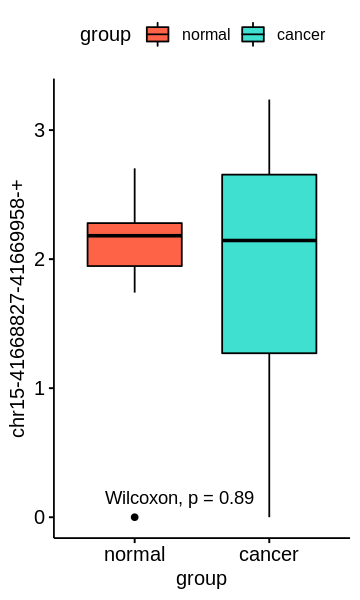

In [87]:
library(ggpubr)
p<-ggboxplot(expmat4, x="group", y="chr15-41668827-41669958-+", fill = "group",palette =c('tomato','turquoise'))+
    stat_compare_means(label.y = 0.1)
p
ggsave('0717-chr15-41668827-41669958-+.pdf',height=5,width=3)

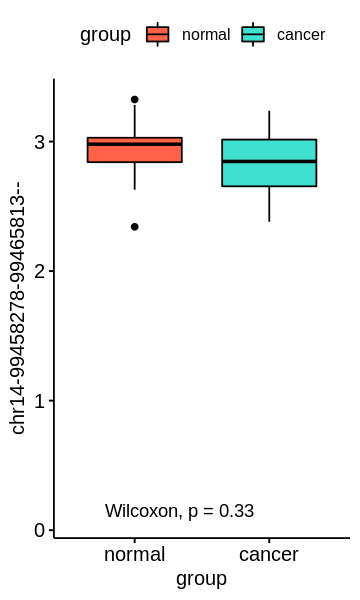

In [88]:
library(ggpubr)
p<-ggboxplot(expmat4, x="group", y="chr14-99458278-99465813--", fill = "group",palette =c('tomato','turquoise'))+
    stat_compare_means(label.y = 0.1)
p
ggsave('0717-chr14-99458278-99465813--.pdf',height=5,width=3)

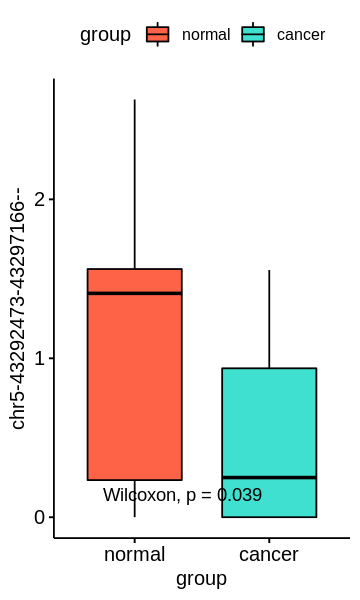

In [89]:
library(ggpubr)
p<-ggboxplot(expmat4, x="group", y="chr5-43292473-43297166--", fill = "group",palette =c('tomato','turquoise'))+
    stat_compare_means(label.y = 0.1)
p
ggsave('0717-chr5-43292473-43297166--.pdf',height=5,width=3)

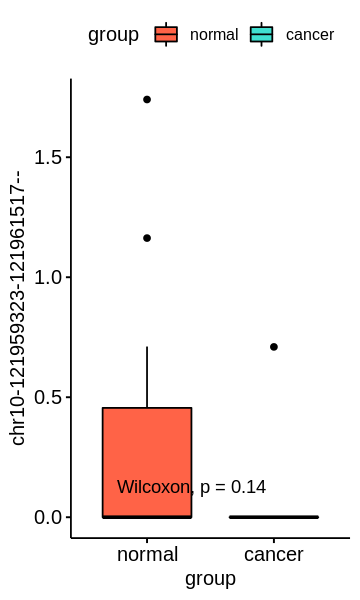

In [90]:
library(ggpubr)
p<-ggboxplot(expmat4, x="group", y="chr10-121959323-121961517--", fill = "group",palette =c('tomato','turquoise'))+
    stat_compare_means(label.y = 0.1)
p
ggsave('0717-chr10-121959323-121961517--.pdf',height=5,width=3)

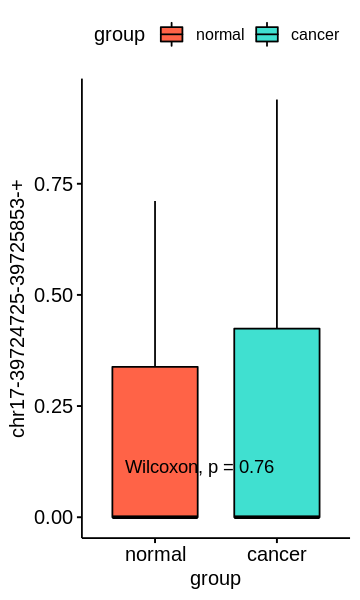

In [91]:
library(ggpubr)
p<-ggboxplot(expmat4, x="group", y="chr17-39724725-39725853-+", fill = "group",palette =c('tomato','turquoise'))+
    stat_compare_means(label.y = 0.1)
p
ggsave('0717-chr17-39724725-39725853-+.pdf',height=5,width=3)

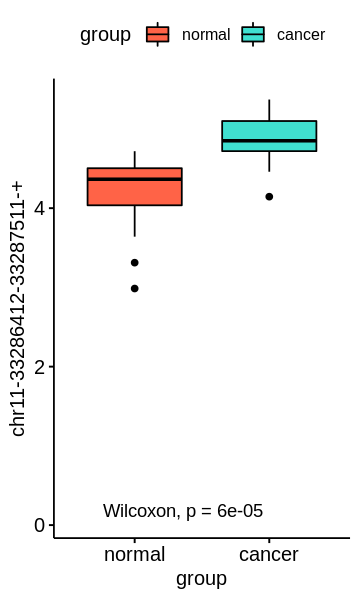

In [92]:
library(ggpubr)
p<-ggboxplot(expmat4, x="group", y="chr11-33286412-33287511-+", fill = "group",palette =c('tomato','turquoise'))+
    stat_compare_means(label.y = 0.1)
p
ggsave('0717-chr11-33286412-33287511-+.pdf',height=5,width=3)

In [93]:
genedraw<-gsub('-','_',genedraw)

In [94]:
genedraw<-gsub('__','_-',genedraw)

In [95]:
genedraw<-as.data.frame(genedraw)
colnames(genedraw)<-'circRNA'

In [96]:
merge(expr_df,genedraw)

circRNA,gene_name,strand
<chr>,<chr>,<chr>
chr1_113834909_113855049_-,PTPN22,-_-
chr1_196793316_196915138_+,CFHR4,+_+
chr1_196793316_196915138_+,BX248415.1,+_+
chr1_196793316_196915138_+,CFHR1,+_+
chr1_196793316_196915138_+,CFHR3,+_+
chr10_126970701_127127764_+,DOCK1,+_+
chr10_93381218_93389154_-,MYOF,-_-
chr10_94941857_94972245_+,CYP2C9,+_+
chr10_95058334_95067691_-,CYP2C8,-_-


In [97]:
normal@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,label,center
,<fct>,<dbl>,<int>,<chr>,<chr>
1Ca.csv,normal,30922,7444,cancer,south
1N.csv,normal,21161,5631,normal,south
2534465Ca.csv,normal,4032,1521,cancer,north
2534465N.csv,normal,4255,1440,normal,north
2537821Ca.csv,normal,12758,4396,cancer,north
2537821N.csv,normal,19409,5855,normal,north
3Ca.csv,normal,19357,5208,cancer,south
3N.csv,normal,23939,5994,normal,south
clean2393116Ca.csv,normal,12193,3610,cancer,north
